# ¡Hola Bienbenidos al análisis Natalia! 😊


Este proyecto revisamos los datos que se obtuvieron en una tienda en línea de videjuegos para entender el comportamiento de los usuarios.



-----

## Tienda Online ICE - Videojuegos

In [2]:
#Importar librerías

import pandas as pd
from scipy import stats as st
import numpy as np
from matplotlib import pyplot as plt
import math
import seaborn as sns


In [3]:
#Cargar de datasets

df_games = pd.read_csv('/datasets/games.csv')

df_games.info()
df_games.head()
print(df_games.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')


## Limpieza de los datasets

In [4]:

#Columnas en minúscula
df_games.columns = df_games.columns.str.lower()
print(df_games.columns)
print()

#Verificar duplicados
print("¿Hay duplicados completos?", df_games.duplicated().any())
print("Número de duplicados completos:", df_games.duplicated().sum())
print()
#Revisar valores nulos
print("Valores nulos por columna:")
print(df_games.isnull().sum())
print()

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

¿Hay duplicados completos? False
Número de duplicados completos: 0

Valores nulos por columna:
name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64



In [5]:
print(f"El dataset tiene {len(df_games)} filas")
print(f"El dataset tiene {len(df_games.columns)} columnas")
print(f"Total de celdas en el dataset: {df_games.size}")

El dataset tiene 16715 filas
El dataset tiene 11 columnas
Total de celdas en el dataset: 183865


## Tratamiento de los Valores nulos
Vamos a revisar por separado para hacer el tratamiento adecuado de valores ausentes. 

*critic_score*:
Trabajar con categoría con puntuación y sin puntuación

*user_score*: Trabajar con categoría con puntuación y sin puntuación

*rating*: Trabajar con categoría sin clasificar y Con clasificación

*year_of_release*: Eliminamos valores ausentes

In [6]:
#Analizar critic_score

df_games['critic_score_category'] = df_games['critic_score'].apply(lambda x: 'Sin puntuación' if pd.isna(x) else 'Con puntuación')

# Verificar el resultado

print(df_games['critic_score_category'].value_counts())
print()

#Tabla para analizar


df_games.groupby('genre')['critic_score_category'].value_counts()
pd.crosstab(df_games['genre'], df_games['critic_score_category'])
print(df_games.groupby('genre')['critic_score_category'].value_counts(normalize=True))


print()

# Crear columna de ventas totales
df_games['total_sales'] = df_games['na_sales'] + df_games['eu_sales'] + df_games['jp_sales'] + df_games['other_sales']

# Comparar ventas promedio
sales_by_critic_category = df_games.groupby('critic_score_category')['total_sales'].agg(['mean', 'median', 'count'])
print(sales_by_critic_category)

Sin puntuación    8578
Con puntuación    8137
Name: critic_score_category, dtype: int64

genre         critic_score_category
Action        Con puntuación           0.560997
              Sin puntuación           0.439003
Adventure     Sin puntuación           0.752111
              Con puntuación           0.247889
Fighting      Sin puntuación           0.518257
              Con puntuación           0.481743
Misc          Sin puntuación           0.701143
              Con puntuación           0.298857
Platform      Con puntuación           0.559685
              Sin puntuación           0.440315
Puzzle        Sin puntuación           0.613793
              Con puntuación           0.386207
Racing        Con puntuación           0.594075
              Sin puntuación           0.405925
Role-Playing  Sin puntuación           0.508011
              Con puntuación           0.491989
Shooter       Con puntuación           0.713530
              Sin puntuación           0.286470
Simulation 

In [7]:
#Analizar user_score

df_games['user_score_category'] = df_games['user_score'].apply(lambda x: 'Sin puntuación' if pd.isna(x) else 'Con puntuación')


In [8]:
#Analizar rating

print('Las categorías del rating son:\n', df_games['rating'].unique())

print()
print('Tabla con valores nulos \n', df_games['rating'].value_counts(dropna=False))
print()
# Analizar patrones en los valores nulos de rating

# Calcular total de juegos por género
total_por_genero = df_games.groupby('genre').size()

# Calcular valores nulos de rating por género
rating_null_by_genre = df_games[df_games['rating'].isna()].groupby('genre').size()

# Calcular porcentaje de nulos por género

porcentaje_nulos = (rating_null_by_genre / total_por_genero) * 100
print(porcentaje_nulos)
#Crear categorías de valores nulos
df_games['rating_category'] = df_games['rating'].apply(lambda x: 'Sin clasificar' if pd.isna(x) else 'Con clasificación')

Las categorías del rating son:
 ['E' nan 'M' 'T' 'E10+' 'K-A' 'AO' 'EC' 'RP']

Tabla con valores nulos 
 NaN     6766
E       3990
T       2961
M       1563
E10+    1420
EC         8
RP         3
K-A        3
AO         1
Name: rating, dtype: int64

genre
Action          35.054912
Adventure       65.771297
Fighting        48.409894
Misc            49.600000
Platform        35.923423
Puzzle          41.034483
Racing          30.184147
Role-Playing    48.130841
Shooter         22.978080
Simulation      34.936999
Sports          35.732538
Strategy        50.366032
dtype: float64


In [9]:

# Solo 269 de 16,715 registros (1.6% aprox)
df_games = df_games.dropna(subset=['year_of_release'])
# Convertir year_of_release a entero
df_games['year_of_release'] = df_games['year_of_release'].astype(int) 

In [10]:
print(df_games.columns.tolist())

# Verificar qué valores únicos tiene user_score
print("Valores únicos en user_score:")
print(df_games['user_score'].unique())

print()

# Limpiar user_score - convertir 'tbd' a NaN y convertir a numérico
df_games['user_score_clean'] = df_games['user_score'].replace('tbd', np.nan)
df_games['user_score_clean'] = pd.to_numeric(df_games['user_score_clean'], errors='coerce')
print()
# Contar valores NaN
nan_u_score = df_games['user_score_clean'].isna().sum()
print(f"Total de valores NaN en user_score_clean: {nan_u_score}")

print(f"Total de valores en la columna: {len(df_games['user_score_clean'])}")

# Verificar la limpieza
print("Estadísticas de user_score clean:")
print(df_games['user_score_clean'].describe())



['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating', 'critic_score_category', 'total_sales', 'user_score_category', 'rating_category']
Valores únicos en user_score:
['8' nan '8.3' '8.5' '6.6' '8.4' '8.6' '7.7' '6.3' '7.4' '8.2' '9' '7.9'
 '8.1' '8.7' '7.1' '3.4' '5.3' '4.8' '3.2' '8.9' '6.4' '7.8' '7.5' '2.6'
 '7.2' '9.2' '7' '7.3' '4.3' '7.6' '5.7' '5' '9.1' '6.5' 'tbd' '8.8' '6.9'
 '9.4' '6.8' '6.1' '6.7' '5.4' '4' '4.9' '4.5' '9.3' '6.2' '4.2' '6' '3.7'
 '4.1' '5.8' '5.6' '5.5' '4.4' '4.6' '5.9' '3.9' '3.1' '2.9' '5.2' '3.3'
 '4.7' '5.1' '3.5' '2.5' '1.9' '3' '2.7' '2.2' '2' '9.5' '2.1' '3.6' '2.8'
 '1.8' '3.8' '0' '1.6' '9.6' '2.4' '1.7' '1.1' '0.3' '1.5' '0.7' '1.2'
 '2.3' '0.5' '1.3' '0.2' '0.6' '1.4' '0.9' '1' '9.7']


Total de valores NaN en user_score_clean: 8983
Total de valores en la columna: 16446
Estadísticas de user_score clean:
count    7463.000000
mean        7.126330
std         1.49

In [11]:
# ¿Los juegos CON puntuación de críticos venden diferente que los SIN puntuación?
sales_by_critic_category = df_games.groupby('critic_score_category')['total_sales'].agg(['mean', 'median', 'count'])
print(sales_by_critic_category)
print()
# ¿En qué géneros es más importante tener puntuación de críticos?
genre_critic_analysis = df_games.groupby(['genre', 'critic_score_category'])['total_sales'].mean().unstack()
print(genre_critic_analysis)


                           mean  median  count
critic_score_category                         
Con puntuación         0.693179    0.25   7983
Sin puntuación         0.387940    0.12   8463

critic_score_category  Con puntuación  Sin puntuación
genre                                                
Action                       0.675818        0.319766
Adventure                    0.292688        0.143546
Fighting                     0.627210        0.436667
Misc                         0.885796        0.280050
Platform                     0.804694        1.111469
Puzzle                       0.451591        0.402693
Racing                       0.695352        0.437844
Role-Playing                 0.688810        0.570080
Shooter                      0.889328        0.591180
Simulation                   0.618506        0.339332
Sports                       0.751648        0.380368
Strategy                     0.240203        0.269151


# Análisis de los datos

**Lanzamiento de juegos por año**

Entre el 2006 y 2011 fueron los años con mayor cantidad de lanzamientos de videojuegos

Columnas disponibles: ['name', 'platform', 'genre', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating', 'critic_score_category', 'total_sales', 'user_score_category', 'rating_category', 'user_score_clean']
Índice: year_of_release


<AxesSubplot:title={'center':'Releases per year'}, xlabel='year_of_release'>

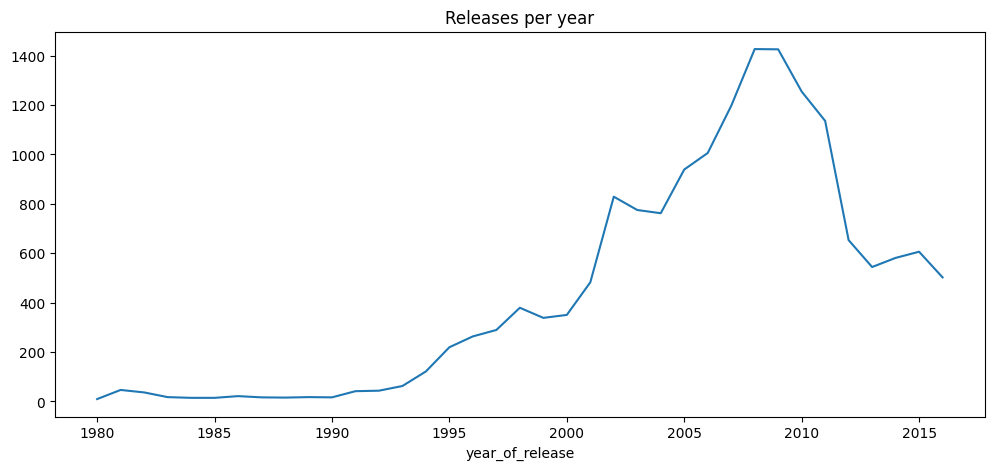

In [12]:

games_by_year = df_games.groupby('year_of_release').count()

print("Columnas disponibles:", games_by_year.columns.tolist())
print("Índice:", games_by_year.index.name)


games_by_year = df_games.groupby('year_of_release').size() 

games_by_year.plot(title='Releases per year', figsize=(12, 5))

**Ventas totales por plataforma**

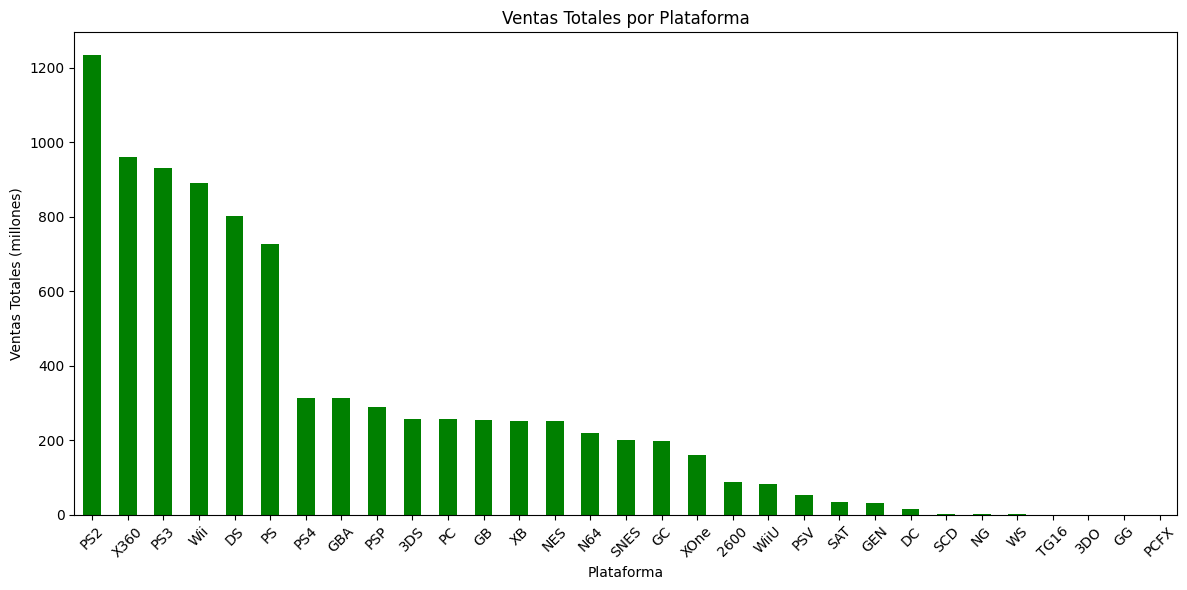

In [13]:
sales_platform = df_games.groupby('platform')['total_sales'].sum()

# Ordenar de mayor a menor y crear gráfico
sales_platform = sales_platform.sort_values(ascending=False)
sales_platform.plot(kind='bar', 
                           title='Ventas Totales por Plataforma', 
                           figsize=(12, 6),
                           xlabel='Plataforma',
                           ylabel='Ventas Totales (millones)', 
                           color = 'green')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [14]:
# Obtener las 6 plataformas con mayores ventas
top_8_platforms = sales_platform.head(8).index.tolist()
print("Top 8 plataformas:", top_8_platforms)

# Filtrar el DataFrame para incluir solo las 6 plataformas principales
df_top_platforms = df_games[df_games['platform'].isin(top_8_platforms)]
print(f"Datos filtrados: {len(df_top_platforms)} registros")

# Agrupar por año y plataforma para obtener ventas totales
sales_evolution = df_top_platforms.groupby(['year_of_release', 'platform'])['total_sales'].sum().unstack(fill_value=0)
print("Primeras filas de la evolución:")
print(sales_evolution)


Top 8 plataformas: ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'PS4', 'GBA']
Datos filtrados: 10465 registros
Primeras filas de la evolución:
platform             DS    GBA      PS     PS2     PS3     PS4     Wii    X360
year_of_release                                                               
1985               0.02   0.00    0.00    0.00    0.00    0.00    0.00    0.00
1994               0.00   0.00    6.03    0.00    0.00    0.00    0.00    0.00
1995               0.00   0.00   35.96    0.00    0.00    0.00    0.00    0.00
1996               0.00   0.00   94.70    0.00    0.00    0.00    0.00    0.00
1997               0.00   0.00  136.17    0.00    0.00    0.00    0.00    0.00
1998               0.00   0.00  169.49    0.00    0.00    0.00    0.00    0.00
1999               0.00   0.00  144.53    0.00    0.00    0.00    0.00    0.00
2000               0.00   0.07   96.37   39.17    0.00    0.00    0.00    0.00
2001               0.00  61.53   35.59  166.43    0.00    0.00    0.00

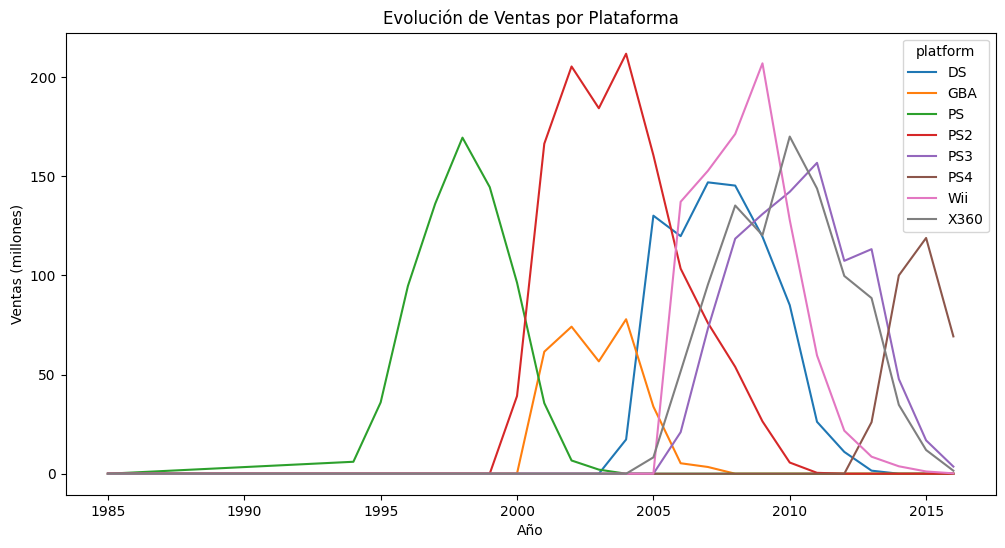

In [15]:
sales_evolution.plot(title='Evolución de Ventas por Plataforma', 
                    figsize=(12, 6))
plt.ylabel('Ventas (millones)')
plt.xlabel('Año')
plt.show()

**Análisis de plataformas según venta y ciclo de vida**

Cada grupo de plataformas tiene un ciclo de vida de aprox. 10 años entre lanzamiento, auge y declive.
1. PS inicia en 1995 y decae cerca de 2004.
2. PS2 comienza en 2000, domina hasta 2010.
3. PS3 arranca en 2006, a 2015.
4. PS4 toma fuerza desde 2014 en adelante.
5. Lo mismo ocurre con Nintendo DS, GBA y Wii, mostrando curvas similares.

Picos de ventas
1. El mayor volumen lo alcanza PS2 (210 millones), seguida de Wii y DS (150 millones).

Competencia intercalada

1. Las plataformas de diferentes fabricantes se superponen en ciclos: mientras una declina, la otra surge. Esto muestra una renovación tecnológica cada 5–6 años, pero con reemplazo de mercado total en 8–10 años.

Duración promedio del ciclo
1. Tiempo de aparición de una nueva generación: 5 años.
2. El ciclo completo de una consola dura 8 a 10 años.

Conclusión

Las nuevas plataformas suelen emerger cada 5 años, solapándose con la anterior durante un periodo de transición. Las antiguas desaparecen 3–5 años después de la entrada de la nueva, lo que configura ciclos de mercado de una década por generación.

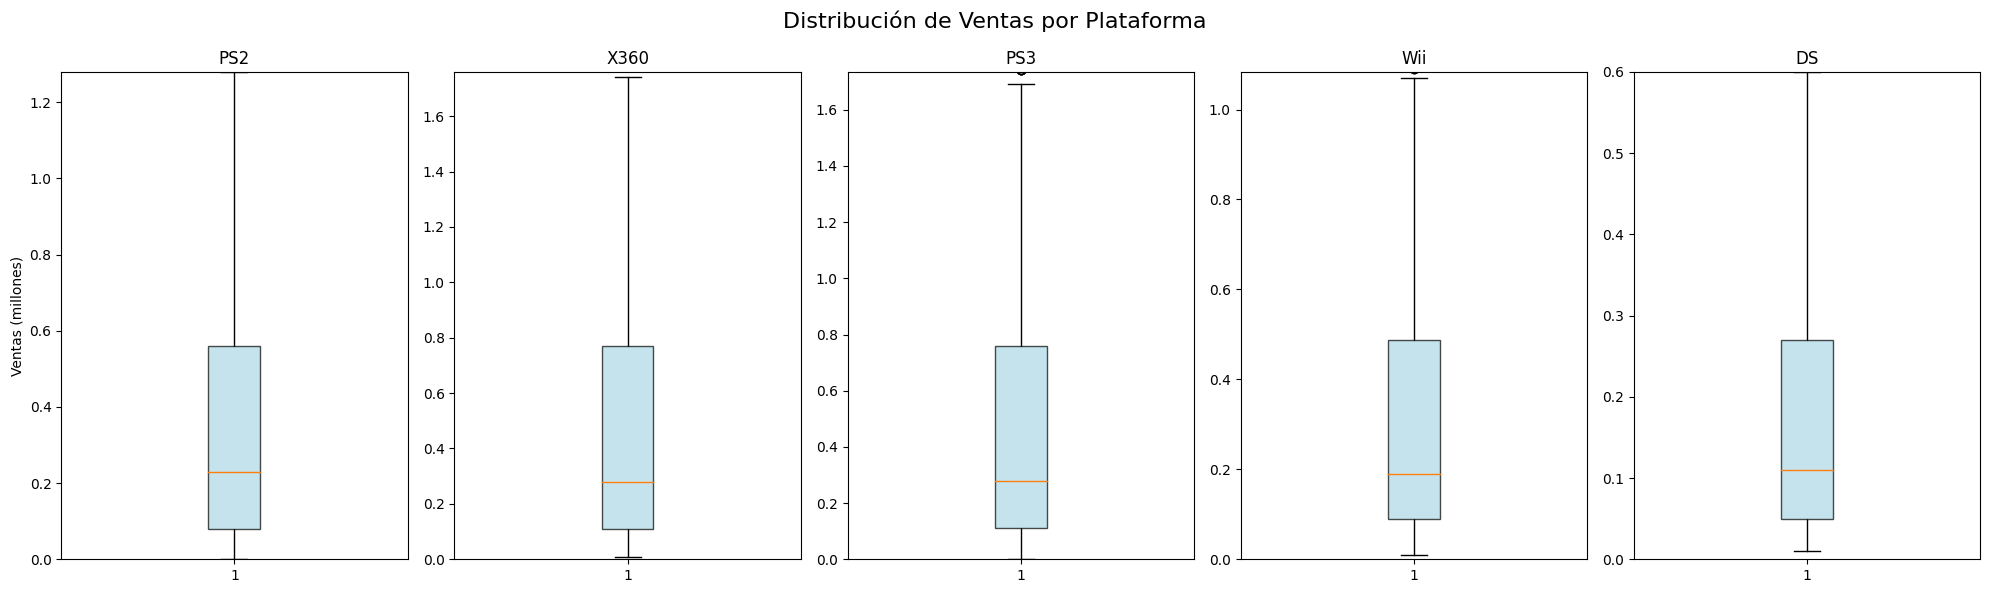

In [16]:

top_5_platforms = ['PS2', 'X360', 'PS3', 'Wii', 'DS']

fig, axes = plt.subplots(1, 5, figsize=(20, 6))

for i, platform in enumerate(top_5_platforms):
    platform_data = df_games[df_games['platform'] == platform]['total_sales']
    
    # Calcular límites usando IQR extendido
    q1 = platform_data.quantile(0.25)
    q3 = platform_data.quantile(0.75)
    iqr = q3 - q1
    upper_limit = q3 + 1.5 * iqr
    
    # Crear boxplot
    axes[i].boxplot(platform_data, patch_artist=True,
                   boxprops=dict(facecolor='lightblue', alpha=0.7))
    
    # Aplicar límite del eje Y
    axes[i].set_ylim(0, upper_limit)
    axes[i].set_title(f'{platform}')
    axes[i].set_ylabel('Ventas (millones)' if i == 0 else '')

plt.suptitle('Distribución de Ventas por Plataforma', fontsize=16)
plt.tight_layout()
plt.show()

La mayoría de los datos están concentrados en valores bajos, y hay pocos valores muy altos que alargan la cola del gráfico hacia la derecha.

La mayoría de los videojuegos venden poco (pocos cientos de miles de copias).
Solo unos pocos éxitos alcanzan ventas de más de 1 millón.

**Comportamiento de ventas comparando critic score**

Aca quisiera entender que en casi todos los casos los que tienen puntuación de un crítico en promedio tienen mayor volumen de ventas

In [17]:
# Vamos a usar PS2 (la plataforma con más ventas)
df_ps2 = df_games[df_games['platform'] == 'PS2'].copy()
print(f"Juegos de PS2: {len(df_ps2)}")
print(f"Juegos con critic_score: {df_ps2['critic_score'].notna().sum()}")
print(f"Juegos con user_score: {df_ps2['user_score_clean'].notna().sum()}")

Juegos de PS2: 2127
Juegos con critic_score: 1275
Juegos con user_score: 1220


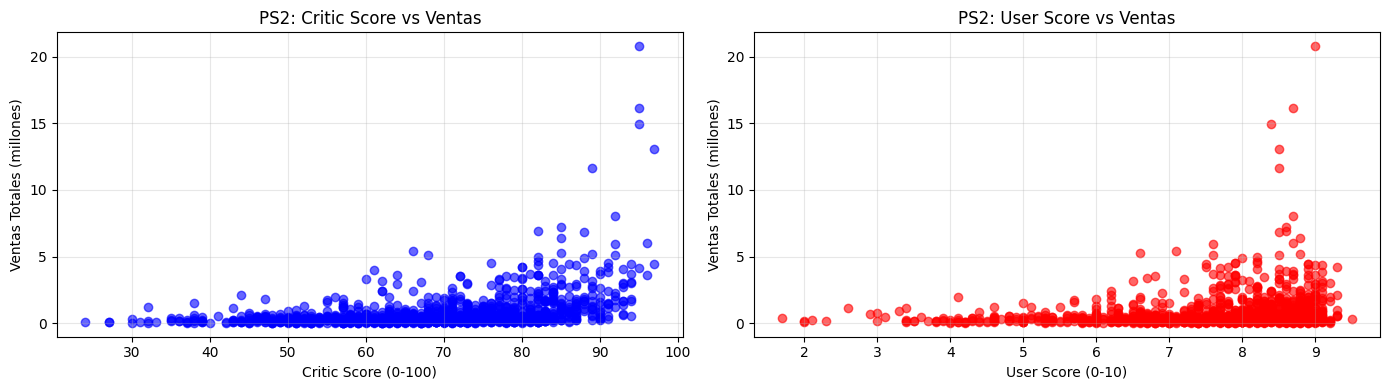

In [44]:
# Crear subplots para ambas correlaciones
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 4))

# Gráfico 1: Critic Score vs Ventas
df_ps2_critic = df_ps2.dropna(subset=['critic_score', 'total_sales'])
ax1.scatter(df_ps2_critic['critic_score'], df_ps2_critic['total_sales'], alpha=0.6, color='blue')
ax1.set_xlabel('Critic Score (0-100)')
ax1.set_ylabel('Ventas Totales (millones)')
ax1.set_title('PS2: Critic Score vs Ventas')
ax1.grid(True, alpha=0.3)

print()

# Gráfico 2: User Score vs Ventas
df_ps2_user = df_ps2.dropna(subset=['user_score_clean', 'total_sales'])
ax2.scatter(df_ps2_user['user_score_clean'], df_ps2_user['total_sales'], alpha=0.6, color='red')
ax2.set_xlabel('User Score (0-10)')
ax2.set_ylabel('Ventas Totales (millones)')
ax2.set_title('PS2: User Score vs Ventas')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [19]:
# Calcular correlaciones
critic_corr = df_ps2_critic['critic_score'].corr(df_ps2_critic['total_sales'])
user_corr = df_ps2_user['user_score_clean'].corr(df_ps2_user['total_sales'])

print(f"Correlación Critic Score vs Ventas: {critic_corr:.3f}")
print(f"Correlación User Score vs Ventas: {user_corr:.3f}")

Correlación Critic Score vs Ventas: 0.393
Correlación User Score vs Ventas: 0.175


**Correlaciones entre las puntuaciones y las ventas**

*Critic Score vs. ventas* Se observa una correlación positiva moderada: a mayor puntuación de los críticos, tienden a presentarse mayores ventas.
Sin embargo, la nube de puntos está muy dispersa: hay juegos con buenas críticas pero pocas ventas, y algunos con ventas altas aunque sin puntuaciones excepcionales.

*User Score vs. ventas* La tendencia es parecida pero más débil: los usuarios valoran positivamente muchos juegos con ventas bajas.
Las puntuaciones de los usuarios muestran una relación positiva más leve que la de los críticos.
Relación positiva débil, las valoraciones de los usuarios tienen poco impacto directo en las ventas.

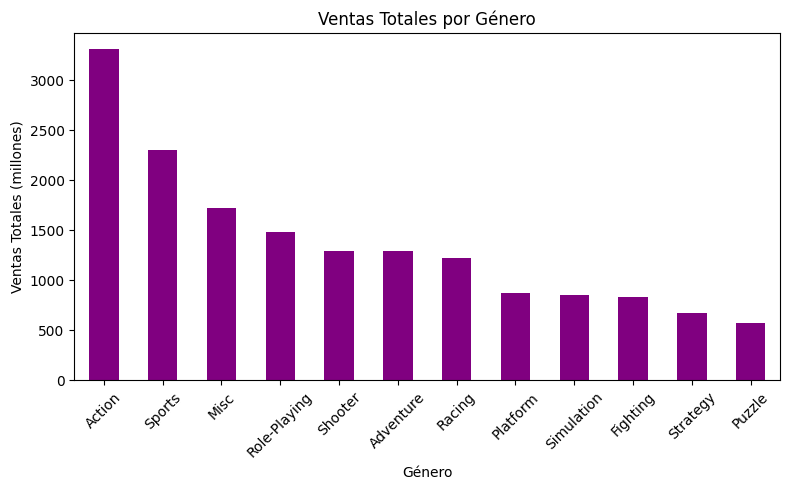

In [20]:
sales_genre = df_games.groupby('genre')['total_sales'].count()

# Ordenar de mayor a menor y crear gráfico
sales_platform = sales_genre.sort_values(ascending=False)
sales_platform.plot(kind='bar', 
                           title='Ventas Totales por Género', 
                           figsize=(8, 5),
                           xlabel='Género',
                           ylabel='Ventas Totales (millones)', 
                           color = 'purple')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**Análisis de ventas vs. géneros**

El género Action lidera con cerca de 3000 copias vendidas, estando cerca de 40% por encima del siguiente que es Sports.
Los géneros con mayores ventas comparten rasgos de competitividad y accesibilidad, lo que los hace atractivos para audiencias amplias y recurrentes. En cambio, los géneros con bajas ventas (Strategy, Simulation, Puzzle) requieren mayor inversión cognitiva y suelen apuntar a nichos más específicos.
En conjunto, el gráfico muestra un mercado dominado por experiencias rápidas y de alto estímulo, mientras los géneros estratégicos y reflexivos mantienen relevancia limitada pero constante dentro de públicos fieles.

## Perfil de usuario por región


**Análisis por región: NA**




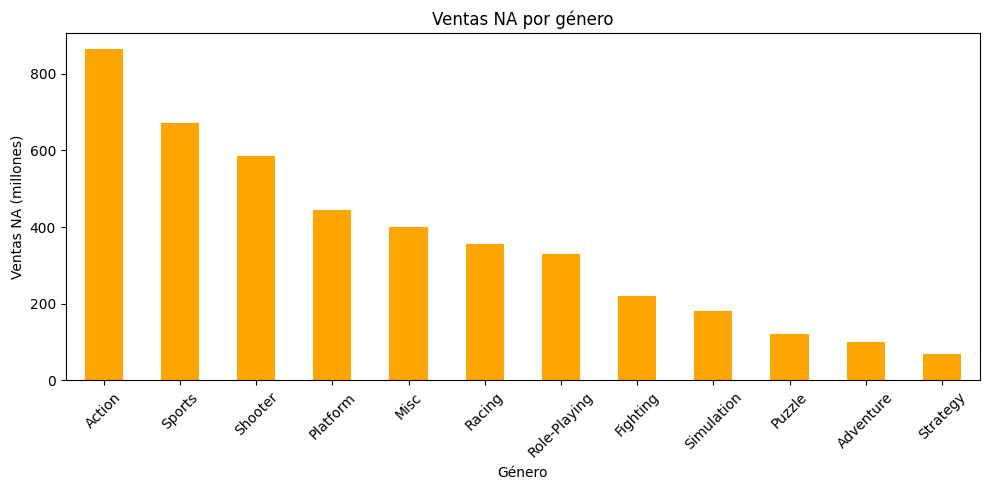

In [21]:
na_sales_genre = df_games.groupby('genre')['na_sales'].sum().sort_values(ascending=False)

na_sales_genre.plot(title='Ventas NA por género', 
                   kind='bar',
                   figsize=(10, 5),
                   xlabel='Género',
                   ylabel='Ventas NA (millones)',
                   color='orange')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()





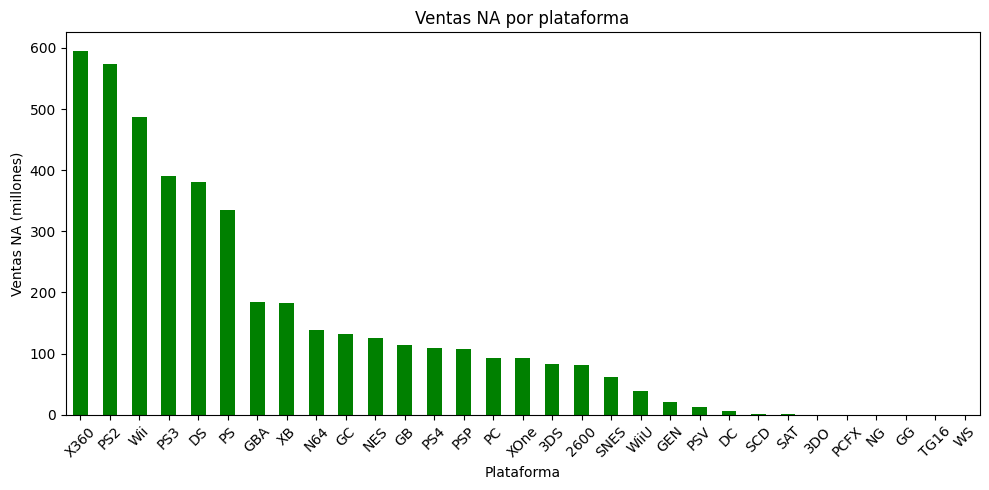

In [22]:

na_sales_platform = df_games.groupby('platform')['na_sales'].sum().sort_values(ascending=False)
na_sales_platform.plot(title='Ventas NA por plataforma', 
                   kind='bar',
                   figsize=(10, 5),
                   xlabel='Plataforma',
                   ylabel='Ventas NA (millones)',
                   color='green')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()




Clasificaciones ESRB disponibles:
NaN     6678
E       3921
T       2905
M       1536
E10+    1393
EC         8
K-A        3
AO         1
RP         1
Name: rating, dtype: int64

Juegos con clasificación ESRB: 9768
Juegos sin clasificación: 6678


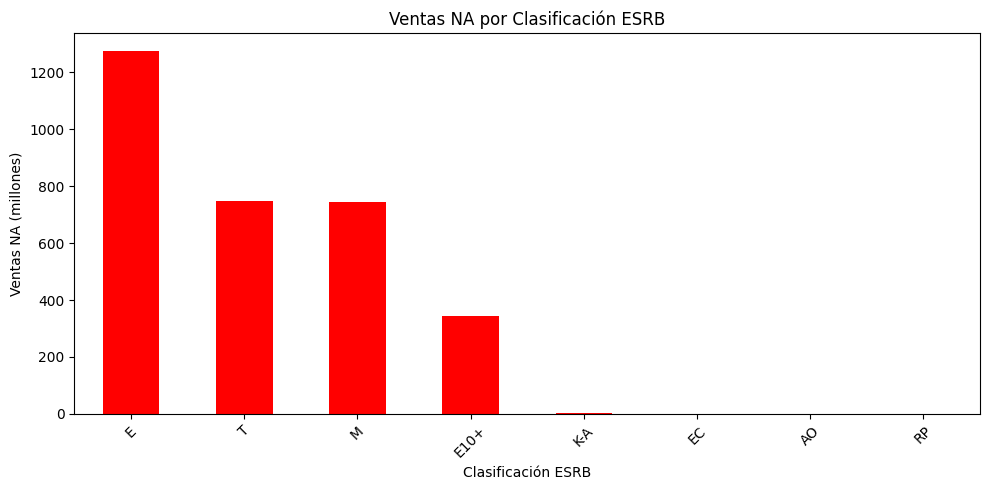

Ventas NA por clasificación ESRB:
rating
E       1274.24
T        747.60
M        742.89
E10+     345.50
K-A        2.56
EC         1.53
AO         1.26
RP         0.00
Name: na_sales, dtype: float64


In [23]:
# Explorar las clasificaciones ESRB
print("Clasificaciones ESRB disponibles:")
print(df_games['rating'].value_counts(dropna=False))
print()

# Ver solo los juegos que tienen clasificación (sin NaN)
df_games_with_rating = df_games.dropna(subset=['rating'])
print(f"Juegos con clasificación ESRB: {len(df_games_with_rating)}")
print(f"Juegos sin clasificación: {df_games['rating'].isna().sum()}")

# Agrupar ventas NA por clasificación ESRB y ordenar de mayor a menor
na_sales_rating = df_games_with_rating.groupby('rating')['na_sales'].sum().sort_values(ascending=False)

# Crear el gráfico
na_sales_rating.plot(title='Ventas NA por Clasificación ESRB',
                     kind='bar',
                     figsize=(10, 5),
                     xlabel='Clasificación ESRB',
                     ylabel='Ventas NA (millones)',
                     color='red')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Mostrar los valores exactos
print("Ventas NA por clasificación ESRB:")
print(na_sales_rating)

## Análisis por región según Plataforma, Clasificación y Género

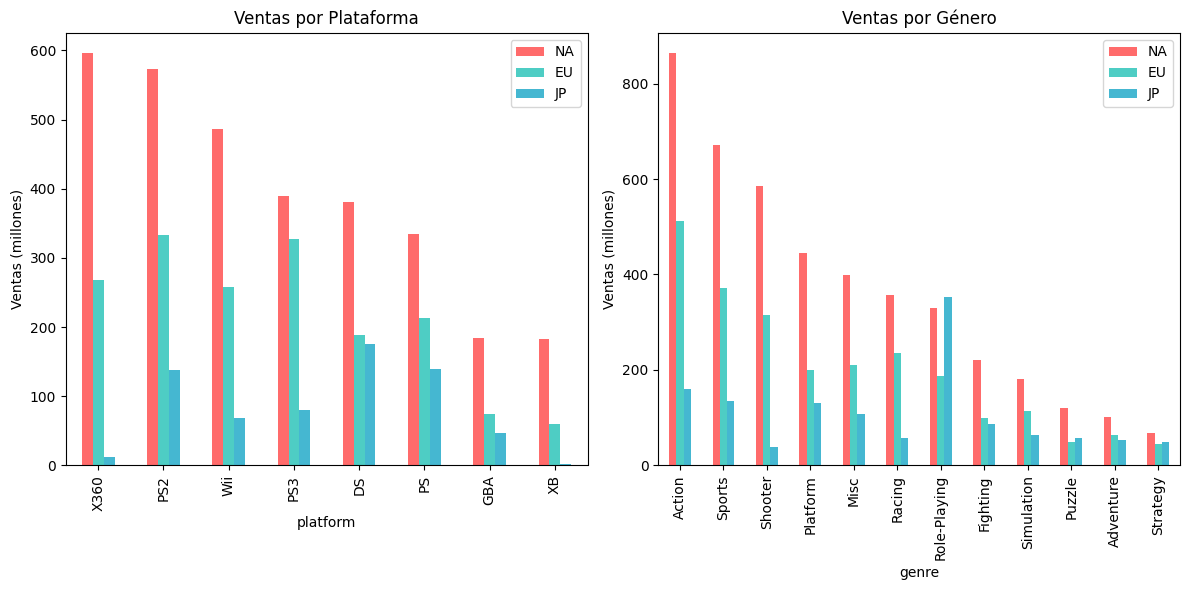

In [24]:

# Preparar los datos para gráficos agrupados
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Colores para las regiones
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1']  # Rojo, Verde azulado, Azul
region_labels = ['NA', 'EU', 'JP']

# Gráfico 1: Por Plataforma
platform_data = df_games.groupby('platform')[['na_sales', 'eu_sales', 'jp_sales']].sum()
platform_data = platform_data.sort_values('na_sales', ascending=False).head(8)  # Top 8 plataformas

platform_data.plot(kind='bar', ax=axes[0], color=colors)
axes[0].set_title('Ventas por Plataforma')
axes[0].set_ylabel('Ventas (millones)')
axes[0].legend(region_labels)

# Gráfico 2: Por Género
genre_data = df_games.groupby('genre')[['na_sales', 'eu_sales', 'jp_sales']].sum()
genre_data = genre_data.sort_values('na_sales', ascending=False)

genre_data.plot(kind='bar', ax=axes[1], color=colors)
axes[1].set_title('Ventas por Género')
axes[1].set_ylabel('Ventas (millones)')
axes[1].legend(region_labels)

plt.tight_layout()
plt.show()

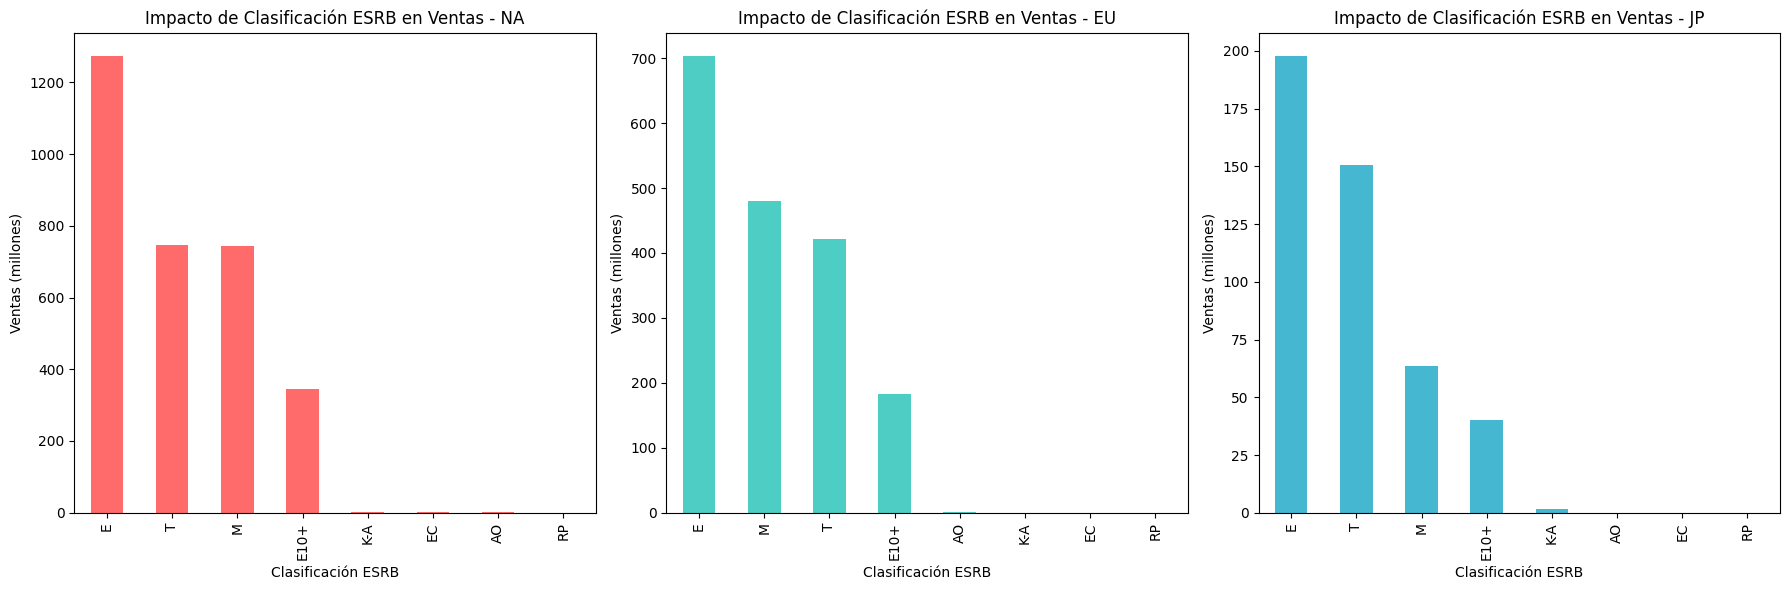

In [25]:
# Crear subplots para cada región
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Datos de clasificaciones ESRB por región
na_rating_data = df_games_with_rating.groupby('rating')['na_sales'].sum().sort_values(ascending=False)
eu_rating_data = df_games_with_rating.groupby('rating')['eu_sales'].sum().sort_values(ascending=False)
jp_rating_data = df_games_with_rating.groupby('rating')['jp_sales'].sum().sort_values(ascending=False)

# Gráfico 1: Región NA
na_rating_data.plot(kind='bar', ax=axes[0], color='#FF6B6B')
axes[0].set_title('Impacto de Clasificación ESRB en Ventas - NA')
axes[0].set_ylabel('Ventas (millones)')
axes[0].set_xlabel('Clasificación ESRB')

# Gráfico 2: Región EU
eu_rating_data.plot(kind='bar', ax=axes[1], color='#4ECDC4')
axes[1].set_title('Impacto de Clasificación ESRB en Ventas - EU')
axes[1].set_ylabel('Ventas (millones)')
axes[1].set_xlabel('Clasificación ESRB')

# Gráfico 3: Región JP
jp_rating_data.plot(kind='bar', ax=axes[2], color='#45B7D1')
axes[2].set_title('Impacto de Clasificación ESRB en Ventas - JP')
axes[2].set_ylabel('Ventas (millones)')
axes[2].set_xlabel('Clasificación ESRB')

plt.tight_layout()
plt.show()



## Perfiles de usuarios NA / EU / JP 


**Análisis por región: NA**:
Xbox 360
PS2
Wii
PS3
DS

Géneros más relevantes:
Action, 
Shooter, 
Sports, 
Racing

La categoría E (Everyone) domina ampliamente, superando 1200 millones.
T (Teen) y M (Mature) tienen valores similares, con ventas intermedias.
Mercado familiar con alta presencia de títulos accesibles, pero con demanda importante de juegos para adolescentes y adultos.

Perfil del consumidor:
Competitivo y orientado a la adrenalina. Prefiere experiencias inmersivas. Busca logros y retos, con inclinación a títulos AAA occidentales.

**Análisis por región: EU**  : 
PS2
PS3
Wii
X360
DS

Géneros más relevantes:
Sports, 
Action, 
Racing, 
Shooter, 
Role-Playing

E también lidera, aunque con menor diferencia respecto a M y T.
Distribución más equilibrada entre edades.



Perfil del consumidor:
Consumidor variado, juegos de habilidad, deportes y acción, pero con menor agresividad que NA. 
Preferencia por contenido general, pero apertura a títulos maduros y de adolescentes.


**Análisis por región: JP**  :
DS
Wii
PS
GBA
PS2

Géneros más relevantes:
Role-Playing, 
Simulation, 
Adventure, 
Strategy, 
Action (menor proporción)


Predominio de E, seguido por T y luego M.


Perfil del consumidor:
Mercado predominantemente familiar y juvenil, con bajo consumo de juegos violentos. Valora accesibilidad y narrativa sobre acción explícita.




Total de juegos SIN puntuación de críticos: 8463
Porcentaje del dataset: 51.5%



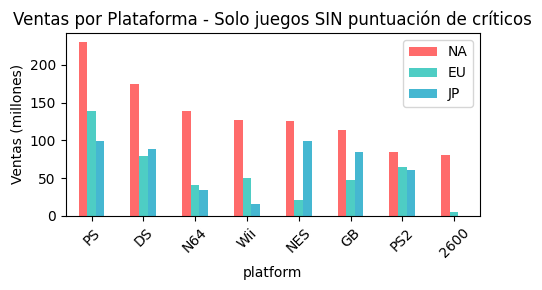

Top 8 plataformas (juegos sin critic_score):
          na_sales  eu_sales  jp_sales
platform                              
PS          230.58    139.12     98.54
DS          174.71     79.81     88.27
N64         138.91     41.03     33.76
Wii         127.20     49.76     15.47
NES         125.94     21.15     98.65
GB          113.64     47.51     85.12
PS2          84.32     64.58     61.04
2600         80.78      4.86      0.00


In [26]:
# Filtrar solo juegos SIN critic_score (valores NaN)
df_sin_critic = df_games[df_games['critic_score'].isna()].copy()

print(f"Total de juegos SIN puntuación de críticos: {len(df_sin_critic)}")
print(f"Porcentaje del dataset: {len(df_sin_critic)/len(df_games)*100:.1f}%")
print()

# Análisis de ventas por plataforma - solo juegos SIN critic_score
platform_data_sin_critic = df_sin_critic.groupby('platform')[['na_sales', 'eu_sales', 'jp_sales']].sum()
platform_data_sin_critic = platform_data_sin_critic.sort_values('na_sales', ascending=False).head(8)

# Crear el gráfico
fig, ax = plt.subplots(figsize=(5, 3))
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1']  # Rojo, Verde azulado, Azul
region_labels = ['NA', 'EU', 'JP']

platform_data_sin_critic.plot(kind='bar', ax=ax, color=colors)
ax.set_title('Ventas por Plataforma - Solo juegos SIN puntuación de críticos')
ax.set_ylabel('Ventas (millones)')
ax.legend(region_labels)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("Top 8 plataformas (juegos sin critic_score):")
print(platform_data_sin_critic)

## Algunos insights

Al analizar las ventas por plataformas mas usadas, tomando en cuenta las ventas de las consolas sin puntuaciones de citico_score, plataformas como PS, DS, y N64 lideran estas ventas, en los anteriores ejercicios veiamos a un Xbox, PS2 y Wii liderando las ventas, pero aca puedo sacar dos conclusiones, considerando de que el porcentaje de valores sin critic score ronda el 40% del dataset. 

1. Plataformas como XBOX o PS2 no tienen tanta ausencia de critic_score, por lo que puede que haya una correlación con las ventas.
2. Para PS al ser una de las plataformas mas vendidas sin embargo fué lanzada en fechas muy tempranas por lo que no tenemos certeza si realmente infería el critic_score en las ventas por ello debe ser la falta de datos en esta plataforma.


## Prueba de hipótesis


**1. Hipótesis nula (H₀)** 

H0 :μXbox = μPC

No hay diferencia significativa entre las medias de calificaciones de usuarios en ambas plataformas

**Hipótesis alternativa (H₁)**

H1 : μXbox  μPC

Existe una diferencia significativa entre las medias de calificaciones.

In [27]:
# Paso 1: Explorar los datos disponibles
print("Plataformas únicas en el dataset:")
print(df_games['platform'].unique())
print()

# Verificar si tenemos Xbox One y PC
xbox_one_games = df_games[df_games['platform'] == 'XOne']
pc_games = df_games[df_games['platform'] == 'PC']

print(f"Juegos de Xbox One: {len(xbox_one_games)}")
print(f"Juegos de PC: {len(pc_games)}")

# Paso 1: Filtrar datos para Xbox One y PC con user_score_clean válidos
xbox_one_scores = df_games[(df_games['platform'] == 'XOne') & 
                          (df_games['user_score_clean'].notna())]['user_score_clean']

pc_scores = df_games[(df_games['platform'] == 'PC') & 
                    (df_games['user_score_clean'].notna())]['user_score_clean']

print(f"Xbox One - Juegos con calificación válida: {len(xbox_one_scores)}")
print(f"PC - Juegos con calificación válida: {len(pc_scores)}")
print()

# Paso 2: Estadísticas descriptivas
print("Estadísticas Xbox One:")
print(f"Media: {xbox_one_scores.mean():.2f}")
print(f"Desviación estándar: {xbox_one_scores.std():.2f}")
print()

print("Estadísticas PC:")
print(f"Media: {pc_scores.mean():.2f}")
print(f"Desviación estándar: {pc_scores.std():.2f}")

Plataformas únicas en el dataset:
['Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' 'PS4' '3DS' 'N64'
 'PS' 'XB' 'PC' '2600' 'PSP' 'XOne' 'WiiU' 'GC' 'GEN' 'DC' 'PSV' 'SAT'
 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']

Juegos de Xbox One: 247
Juegos de PC: 957
Xbox One - Juegos con calificación válida: 182
PC - Juegos con calificación válida: 755

Estadísticas Xbox One:
Media: 6.52
Desviación estándar: 1.38

Estadísticas PC:
Media: 7.07
Desviación estándar: 1.53


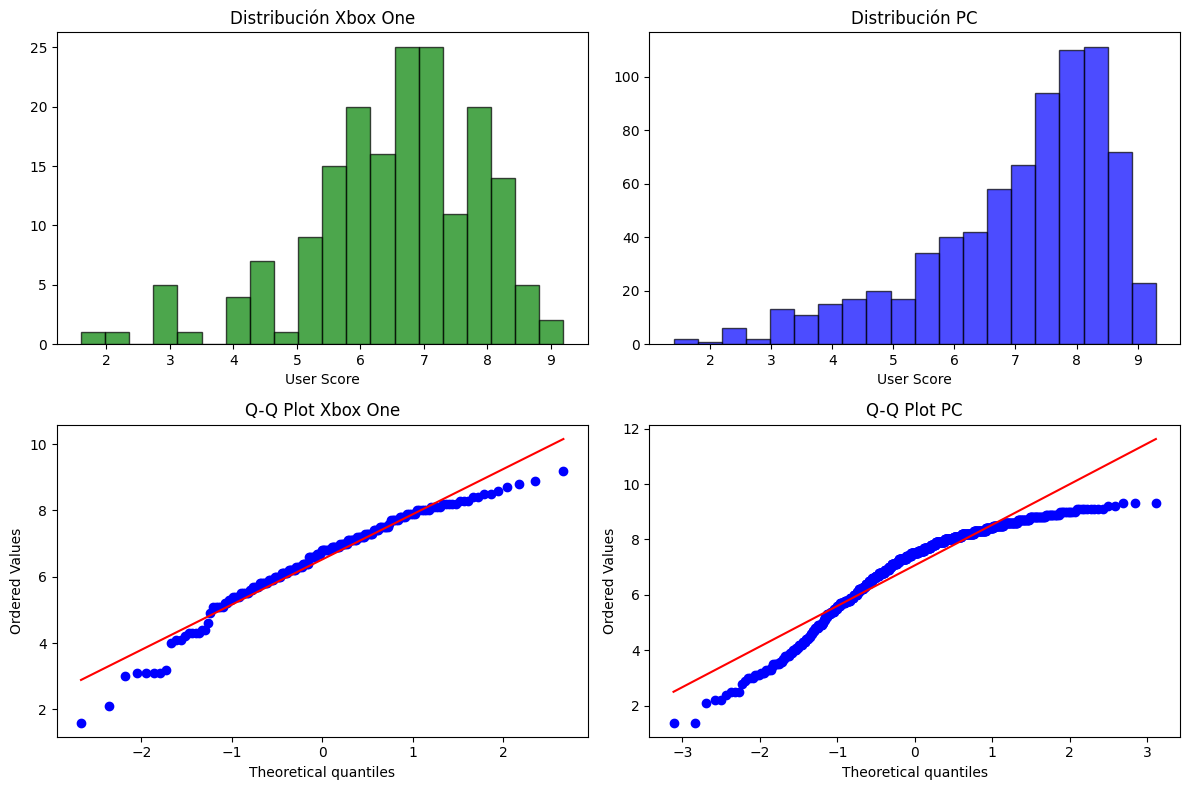

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear subplots para comparar las distribuciones
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Histogramas
axes[0,0].hist(xbox_one_scores, bins=20, alpha=0.7, color='green', edgecolor='black')
axes[0,0].set_title('Distribución Xbox One')
axes[0,0].set_xlabel('User Score')

axes[0,1].hist(pc_scores, bins=20, alpha=0.7, color='blue', edgecolor='black')
axes[0,1].set_title('Distribución PC')
axes[0,1].set_xlabel('User Score')

# Q-Q plots para normalidad
from scipy import stats
stats.probplot(xbox_one_scores, dist="norm", plot=axes[1,0])
axes[1,0].set_title('Q-Q Plot Xbox One')

stats.probplot(pc_scores, dist="norm", plot=axes[1,1])
axes[1,1].set_title('Q-Q Plot PC')

plt.tight_layout()
plt.show()

In [32]:
from scipy.stats import levene

# Test de Levene para igualdad de varianzas
stat_levene, p_value_levene = levene(xbox_one_scores, pc_scores)

print(f"Test de Levene:")
print(f"Estadístico: {stat_levene:.4f}")
print(f"P-valor: {p_value_levene:.4f}")

# También comparemos las varianzas directamente
var_xbox = np.var(xbox_one_scores, ddof=1)
var_pc = np.var(pc_scores, ddof=1)

print(f"\nVarianzas:")
print(f"Xbox One: {var_xbox:.4f}")
print(f"PC: {var_pc:.4f}")
print(f"Ratio (PC/Xbox): {var_pc/var_xbox:.4f}")

Test de Levene:
Estadístico: 1.1706
P-valor: 0.2796

Varianzas:
Xbox One: 1.9070
PC: 2.3492
Ratio (PC/Xbox): 1.2319


In [33]:
from scipy.stats import ttest_ind

# Prueba t con varianzas iguales
t_stat, p_value = ttest_ind(xbox_one_scores, pc_scores, equal_var=True)

print(f"Prueba t de Student:")
print(f"Estadístico t: {t_stat:.4f}")
print(f"P-valor: {p_value:.4f}")

Prueba t de Student:
Estadístico t: -4.3829
P-valor: 0.0000


In [34]:
from scipy.stats import ttest_ind

# Prueba t con varianzas iguales
t_stat, p_value = ttest_ind(xbox_one_scores, pc_scores, equal_var=True)

print(f"Prueba t de Student:")
print(f"Estadístico t: {t_stat:.4f}")
print(f"P-valor: {p_value:.4f}")

Prueba t de Student:
Estadístico t: -4.3829
P-valor: 0.0000


RECHAZAMOS H₀ → HAY DIFERENCIA SIGNIFICATIVA

El p-valor < 0.0001 es altamente significativo, indicando una diferencia real entre las calificaciones de Xbox One y PC.


**2. Hipótesis nula (H₀)** 

H0 :μXaccion = μdeportes

No hay diferencia entre las calificaciones promedio de los usuarios para los géneros de Acción y Deportes.


**Hipótesis alternativa (H₁)**

H1 : μXaccion   μdeportes

Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.

In [35]:
# Filtrar datos para géneros Action y Sports con calificaciones válidas
action_scores = df_games[(df_games['genre'] == 'Action') & 
                        (df_games['user_score_clean'].notna())]['user_score_clean']

sports_scores = df_games[(df_games['genre'] == 'Sports') & 
                        (df_games['user_score_clean'].notna())]['user_score_clean']

print(f"Juegos de Acción con calificación válida: {len(action_scores)}")
print(f"Juegos de Deportes con calificación válida: {len(sports_scores)}")
print()

# Estadísticas descriptivas
print("=== ESTADÍSTICAS DESCRIPTIVAS ===")
print("Acción:")
print(f"Media: {action_scores.mean():.2f}")
print(f"Mediana: {action_scores.median():.2f}")
print(f"Desviación estándar: {action_scores.std():.2f}")
print()

print("Deportes:")
print(f"Media: {sports_scores.mean():.2f}")
print(f"Mediana: {sports_scores.median():.2f}")
print(f"Desviación estándar: {sports_scores.std():.2f}")

Juegos de Acción con calificación válida: 1796
Juegos de Deportes con calificación válida: 1081

=== ESTADÍSTICAS DESCRIPTIVAS ===
Acción:
Media: 7.06
Mediana: 7.40
Desviación estándar: 1.42

Deportes:
Media: 6.95
Mediana: 7.40
Desviación estándar: 1.62


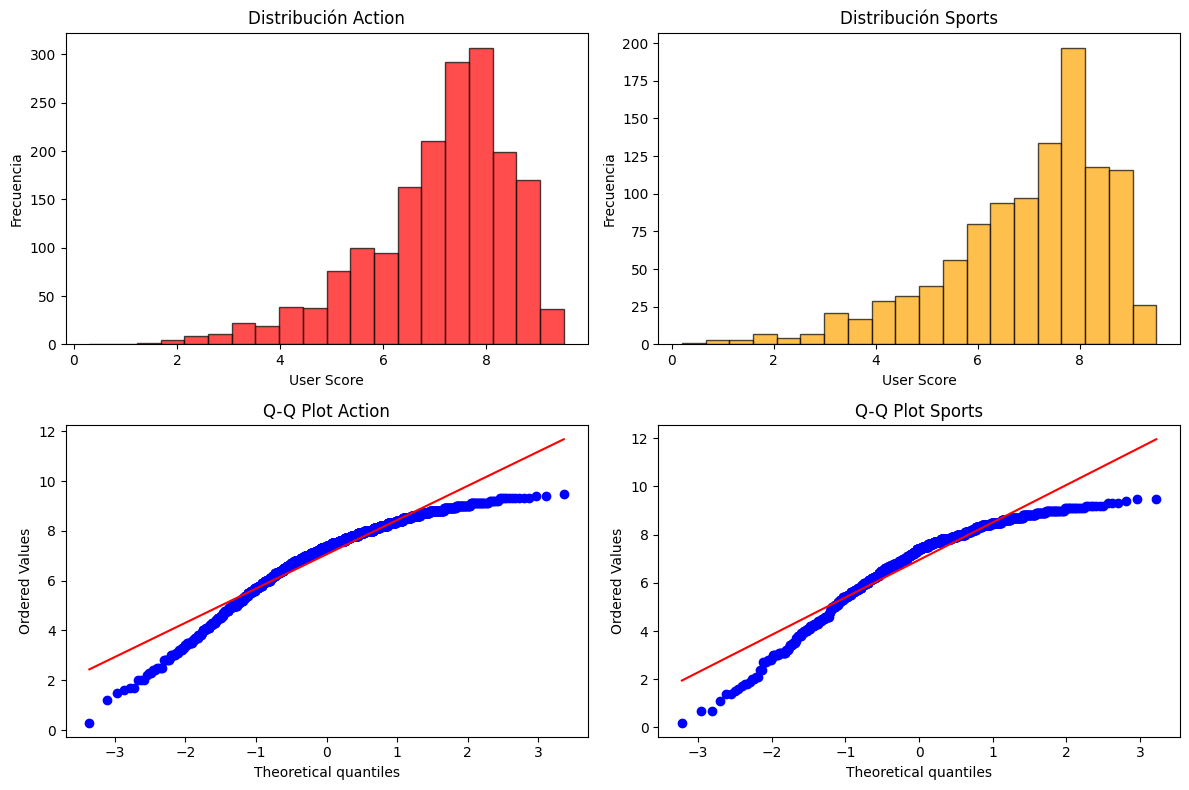

In [37]:
# Crear subplots para comparar las distribuciones de Action y Sports
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Histogramas
axes[0,0].hist(action_scores, bins=20, alpha=0.7, color='red', edgecolor='black')
axes[0,0].set_title('Distribución Action')
axes[0,0].set_xlabel('User Score')
axes[0,0].set_ylabel('Frecuencia')

axes[0,1].hist(sports_scores, bins=20, alpha=0.7, color='orange', edgecolor='black')
axes[0,1].set_title('Distribución Sports')
axes[0,1].set_xlabel('User Score')
axes[0,1].set_ylabel('Frecuencia')

# Q-Q plots para normalidad
from scipy import stats
stats.probplot(action_scores, dist="norm", plot=axes[1,0])
axes[1,0].set_title('Q-Q Plot Action')

stats.probplot(sports_scores, dist="norm", plot=axes[1,1])
axes[1,1].set_title('Q-Q Plot Sports')

plt.tight_layout()
plt.show()

In [38]:
from scipy.stats import levene

# Test de Levene para igualdad de varianzas entre Action y Sports
stat_levene, p_value_levene = levene(action_scores, sports_scores)

print(f"Test de Levene (Action vs Sports):")
print(f"Estadístico: {stat_levene:.4f}")
print(f"P-valor: {p_value_levene:.4f}")
print()

# Comparar varianzas directamente
var_action = np.var(action_scores, ddof=1)
var_sports = np.var(sports_scores, ddof=1)

print(f"Varianzas:")
print(f"Action: {var_action:.4f}")
print(f"Sports: {var_sports:.4f}")
print(f"Ratio (Sports/Action): {var_sports/var_action:.4f}")

Test de Levene (Action vs Sports):
Estadístico: 15.4298
P-valor: 0.0001

Varianzas:
Action: 2.0275
Sports: 2.6231
Ratio (Sports/Action): 1.2937


Como el Test de Levene mostró varianzas diferentes (p = 0.0001) entre Action y Sports, el test de Welch es el adecuado para comparar las medias de calificaciones entre ambos géneros.

In [40]:
## Aplicamos el test de Welch que sirve para muestras independientes
ttest_ind(action_scores, sports_scores, equal_var=False)

Ttest_indResult(statistic=1.789373351094851, pvalue=0.07370217419278526)

NO SE RECHAZA LA HIPÓTESIS NULA H0

El p-valor es mayor que 0.05 del test de Welch


Los usuarios valoran de forma similar los géneros Acción y Deportes.
No se puede afirmar que uno sea mejor percibido que el otro, lo que sugiere que ambos géneros mantienen niveles de satisfacción comparables dentro del mercado.

No hay diferencia significativa no significa que sean exactamente iguales, sino que con los datos actuales no se puede demostrar una diferencia real.
Puede existir una diferencia pequeña que la muestra no logra detectar (por tamaño, variabilidad o sesgo).

## Conclusiones y recomendaciones


1. Tenemos un dataset con columnas de valores ausentes que se han tomado desiciones alternativas para el tratamiento de los mismos, sin embargo en la mayor parte de los análisis utilizamos únicamente los valores disponibles según variables.
2. Las medias de calificación entre Xbox One y PC son estadísticamente iguales al nivel de confianza del 95%.
Los jugadores de ambas plataformas muestran comportamientos de evaluación similares, indicando una percepción de calidad equivalente en la experiencia de juego, aunque también tenemos que prestar atención al análisis realizado de únicamente los valores nulos donde descubrimos que XBOX carece de valores nulos en critic_score, por lo que podría tener una implicancia a las ventas.

3. En promedio, los usuarios valoran de forma similar los géneros Acción y Deportes, aunque el género Deportes provoca valoraciones más polarizadas.